In [2]:
# Import data and libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import ibuttonplots
import importibuttondata
%matplotlib inline
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import MapQuestOSM

pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

files = glob.glob('./data/*[tT].csv')
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
meta0 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

#files = glob.glob('./data/*[tT].csv')
files = glob.glob('./data/falldownload/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
#meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames)
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

/Users/ascott47/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/ascott47/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


http://osm.woc.noaa.gov/mapcache
id: OGC:WMS, version: 1.1.1
title: OSM MapServer Provided by NOAA WOC, abstract: None
available layers:
['osm', 'rootlayer']
projection options:
['EPSG:900913', 'EPSG:4326', 'EPSG:3857']


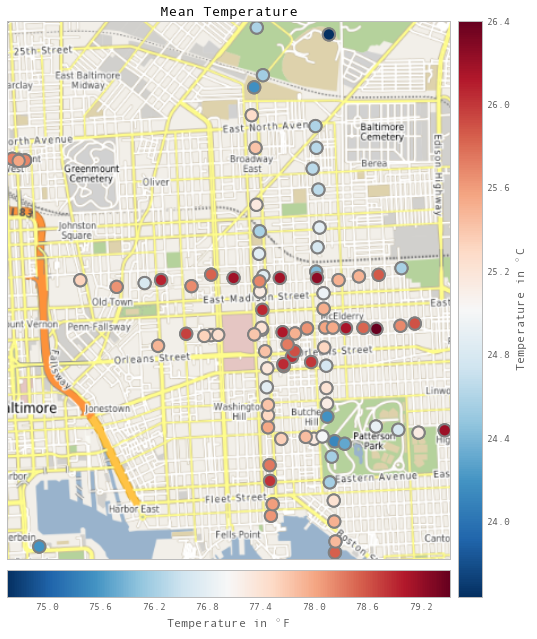

In [228]:
fig  = plt.figure(figsize=(30, 30))
x = meta['location:Longitude'].values
y = meta['location:Latitude'].values
c = tempDF.mean(axis=0).values # The colors will show the mean temp at that location
marker_size = 150
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=meta['location:Longitude'].min()-.0005,
            llcrnrlat=meta['location:Latitude'].min()-.0005,
            urcrnrlon=meta['location:Longitude'].max()+.0005,
            urcrnrlat=meta['location:Latitude'].max()+.0005,
            projection='mill',
            #projection = 'merc',
            resolution ='h',
            #area_thresh=1000.
            epsg=3857
            )
wms_server = "http://osm.woc.noaa.gov/mapcache" 
map.wmsimage(wms_server, layers = ["osm"], verbose = True)

#m.drawmapboundary(fill_color='#a6bddb')
#m.drawcounties()
#m.fillcontinents(color = '#f0f0f0', zorder =0 )

celsius = m.scatter(x,y, s = marker_size, 
                    c = c, 
                    cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')
cbar1 = m.colorbar(celsius, location = 'right', label = 'Temperature in $^\circ $C')

fahr = m.scatter(x,y, s = marker_size, c =(c[:]*9./5. + 32.),
                 cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')

cbar2 = m.colorbar(fahr, location = 'bottom', label = 'Temperature in $^\circ $F')

plt.title('Mean Temperature')
#plt.show()
plt.savefig('meantempmap.png')

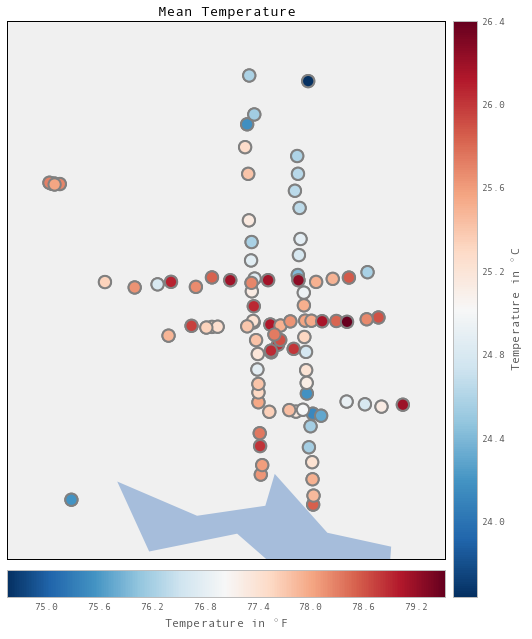

In [226]:
fig  = plt.figure(figsize=(20, 15))
x = meta['location:Longitude'].values
y = meta['location:Latitude'].values
c = tempDF.mean(axis=0).values # The colors will show the mean temp at that location
marker_size = 150
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=meta['location:Longitude'].min()-.005,
            llcrnrlat=meta['location:Latitude'].min()-.005,
            urcrnrlon=meta['location:Longitude'].max()+.005,
            urcrnrlat=meta['location:Latitude'].max()+.005,
            projection='mill',
            #projection = 'merc',
            resolution ='h',
            #area_thresh=1000.
            epsg=3857
            )
#wms_server = "http://osm.woc.noaa.gov/mapcache" 
#map.wmsimage(wms_server, layers = ["osm"], verbose = True)

m.drawmapboundary(fill_color='#a6bddb')
#m.drawcounties()
m.fillcontinents(color = '#f0f0f0', zorder =0 )

celsius = m.scatter(x,y, s = marker_size, 
                    c = c, 
                    cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')
cbar1 = m.colorbar(celsius, location = 'right', label = 'Temperature in $^\circ $C')

fahr = m.scatter(x,y, s = marker_size, c =(c[:]*9./5. + 32.),
                 cmap = matplotlib.cm.RdBu_r, 
                    latlon = True, 
                    lw = 2, 
                    edgecolor = 'gray')

cbar2 = m.colorbar(fahr, location = 'bottom', label = 'Temperature in $^\circ $F')

plt.title('Mean Temperature')
#plt.show()
plt.savefig('meantempmapnobackground.png')

In [3]:
llcrnrlon=meta['location:Longitude'].min()-.005
llcrnrlat=meta['location:Latitude'].min()-.005
urcrnrlon=meta['location:Longitude'].max()+.005
urcrnrlat=meta['location:Latitude'].max()+.005

print llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon

39.15784233 39.35771436 -76.67485004 -76.56700295


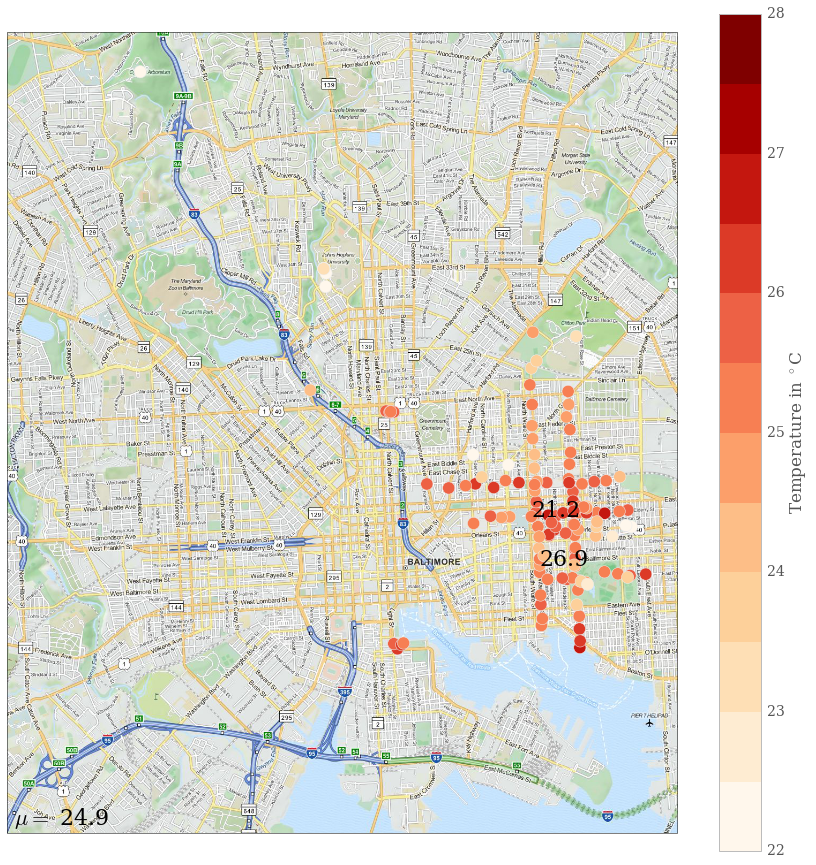

In [6]:
"""
Produces a map showing London Underground station locations with high
resolution background imagery provided by MapQuest.

"""
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import MapQuestOSM
imagery = MapQuestOSM()

figHandle = plt.figure(figsize=[15,15])
ax = plt.axes(projection=imagery.crs)
#ax.set_extent((-0.14, -0.1, 51.495, 51.515))
ax.set_extent(( llcrnrlon, urcrnrlon, llcrnrlat+.1, urcrnrlat))

# Construct concentric circles and a rectangle,
# suitable for a London Underground logo.
#theta = np.linspace(0, 2 * np.pi, 100)
#circle_verts = np.vstack([np.sin(theta), np.cos(theta)]).T
#concentric_circle = Path.make_compound_path(Path(circle_verts[::-1]),
#                                            Path(circle_verts * 0.6))

#rectangle = Path([[-1.1, -0.2], [1, -0.2], [1, 0.3], [-1.1, 0.3]])

# Add the imagery to the map.
ax.add_image(imagery, 14)

x = meta['location:Longitude']
y = meta['location:Latitude']
c = tempDF[meta.sensornumber].mean()


#plt.plot(x,y,
#         transform=ccrs.Geodetic(),
#         marker=concentric_circle, markersize=15,
#         linestyle='')
cmap = matplotlib.cm.OrRd
bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plotHandle = ax.scatter(x,y,c = c, s = 150, transform=ccrs.Geodetic(), 
             cmap = cmap,
             norm = norm)

cbar1 = plt.colorbar(plotHandle, 
                     #location = 'right', 
                     label = 'Temperature in $^\circ $C')

lon = x[np.nanargmax(c)]
lat = y[np.nanargmax(c)]
at_x, at_y = ax.projection.transform_point(lon, lat,
                                           src_crs=ccrs.Geodetic())
plt.annotate(
    '%2.1f'%np.nanmax(c.values), xy=(at_x, at_y), #xytext=(30, 20), textcoords='offset points',
    color='black', backgroundcolor='none', size=22,
    )

lon = x[np.nanargmin(c)]
lat = y[np.nanargmin(c)]
at_x, at_y = ax.projection.transform_point(lon, lat,
                                           src_crs=ccrs.Geodetic())
plt.annotate(
    '%2.1f'%np.nanmin(c.values), xy=(at_x, at_y), #xytext=(30, 20), textcoords='offset points',
    color='black', size = 22, backgroundcolor='none')

plt.annotate(
    '$\mu = $ %2.1f'%np.nanmean(c.values), (0.01,0.01), xycoords ='axes fraction', #xytext=(30, 20), textcoords='offset points',
    color='black', size = 22, backgroundcolor='none')

In [ ]:
cmap = matplotlib.cm.OrRd
#if anomaly == '':
bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
#m.scatter()
celsius = m.scatter(x,y, s = marker_size, c =c ,#(c*9./5. + 32.),
                 cmap = cmap,
                 norm = norm,
                 #cmap = matplotlib.cm.RdBu_r,
                    latlon = True,
                    lw = 2,
                    #edgecolor = 'gray',
                    #vmin = (c.mean()-3)*9/5.,
                    #vmax = (c.mean()+3)*9/5.,
                    )
cbar1 = m.colorbar(celsius, location = 'right', label = 'Temperature in $^\circ $C')

In [64]:
cmap = matplotlib.cm.OrRd
bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

ax.scatter(x,y,c = c, s = 150, transform=ccrs.Geodetic(), 
             cmap = cmap,
           #  norm = norm
           )

In [38]:
def mapmean(tempDF, meta, name = '', option = 0):
    import cartopy.crs as ccrs
    from cartopy.io.img_tiles import MapQuestOSM
    #fig  = plt.figure(figsize=(30, 30))
    x = meta['location:Longitude'].values
    y = meta['location:Latitude'].values
    c = tempDF[meta.sensornumber].mean()
    marker_size = 100
    fig = plt.figure(figsize=[15,15])
    imagery = MapQuestOSM()
    ax = plt.axes(projection=imagery.crs)
    
    ax.set_extent(( meta['location:Longitude'].min()-.005, 
                   meta['location:Longitude'].max()+.005 , 
                   meta['location:Latitude'].min()-.005,
                   meta['location:Latitude'].max()+.005))
    ax.add_image(imagery, 14)

    cmap = matplotlib.cm.OrRd
    bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    plotHandle = ax.scatter(x,y,c = c, s = 350, transform=ccrs.Geodetic(), 
                 cmap = cmap,
                 norm = norm)
    if option ==0 : 
        cbar1 = plt.colorbar(plotHandle, label = 'Temperature in $^\circ $C')
    else : 
        cbar1 = plt.colorbar(plotHandle, label = option)
    
    lon = x[np.nanargmax(c)]
    lat = y[np.nanargmax(c)]
    at_x, at_y = ax.projection.transform_point(lon, lat,
                                               src_crs=ccrs.Geodetic())
    plt.annotate(
        '%2.1f'%np.nanmax(c.values), xy=(at_x, at_y), #xytext=(30, 20), textcoords='offset points',
        color='black', backgroundcolor='none', size=22,
        )

    lon = x[np.nanargmin(c)]
    lat = y[np.nanargmin(c)]
    at_x, at_y = ax.projection.transform_point(lon, lat,
                                               src_crs=ccrs.Geodetic())
    plt.annotate(
        '%2.1f'%np.nanmin(c.values), xy=(at_x, at_y), #xytext=(30, 20), textcoords='offset points',
        color='black', size = 22, backgroundcolor='none')

    plt.annotate(
        '$\mu = $ %2.1f'%np.nanmean(c.values), (0.01,0.01), xycoords ='axes fraction', #xytext=(30, 20), textcoords='offset points',
        color='black', size = 22, backgroundcolor='none')
    
    plt.title('Mean Temperature %s'%name)
    filename = './plots/meantempmap%s.eps'%name
    plt.savefig(filename, format = 'eps', dpi = 600)

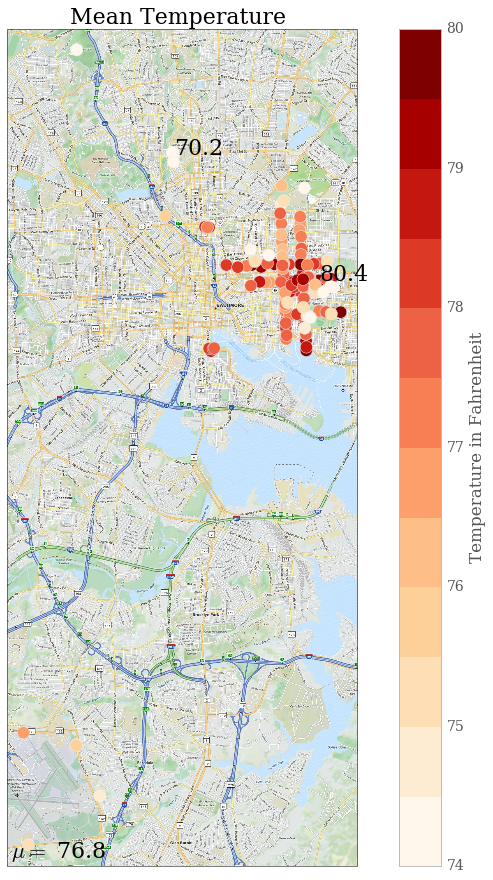

In [19]:
mapmean(tempDF*9/5+32., meta, name = '', option = 'Temperature in Fahrenheit')

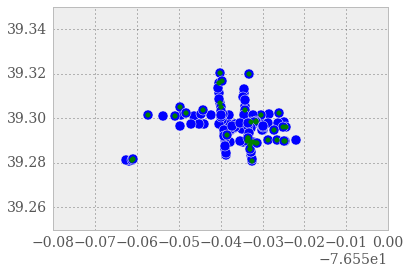

In [20]:
# categorize sensors
ebaltsensorsi = np.where(meta['location:Longitude']>= -76.6125831)#-76.61)# -76.6072591 )
parksi = np.where((meta['landcoverclass'] != 'impervious') & (meta['location:Longitude']>= -76.6125831)) # -76.61) )
plt.scatter(meta['location:Longitude'].iloc[ebaltsensorsi],
            meta['location:Latitude'].iloc[ebaltsensorsi], s = 100)
plt.scatter(meta['location:Longitude'].iloc[parksi],
            meta['location:Latitude'].iloc[parksi], color = 'g')

parksensors = meta.sensornumber.iloc[parksi]
ebaltsensors = meta.sensornumber.iloc[ebaltsensorsi]
nonparks = np.setdiff1d(ebaltsensors, parksensors)

selected = ebaltsensors

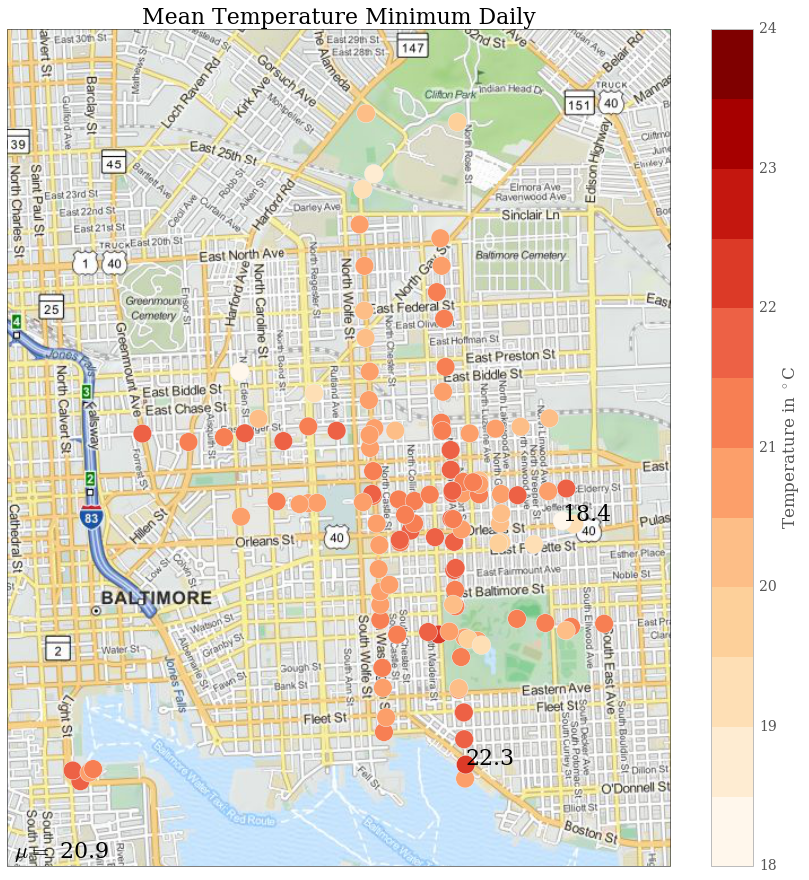

In [39]:
mapmean(tempDF.resample('D', how = 'min')[selected], 
                     meta.loc[selected], name = 'Minimum Daily')

/Users/ascott47/anaconda/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


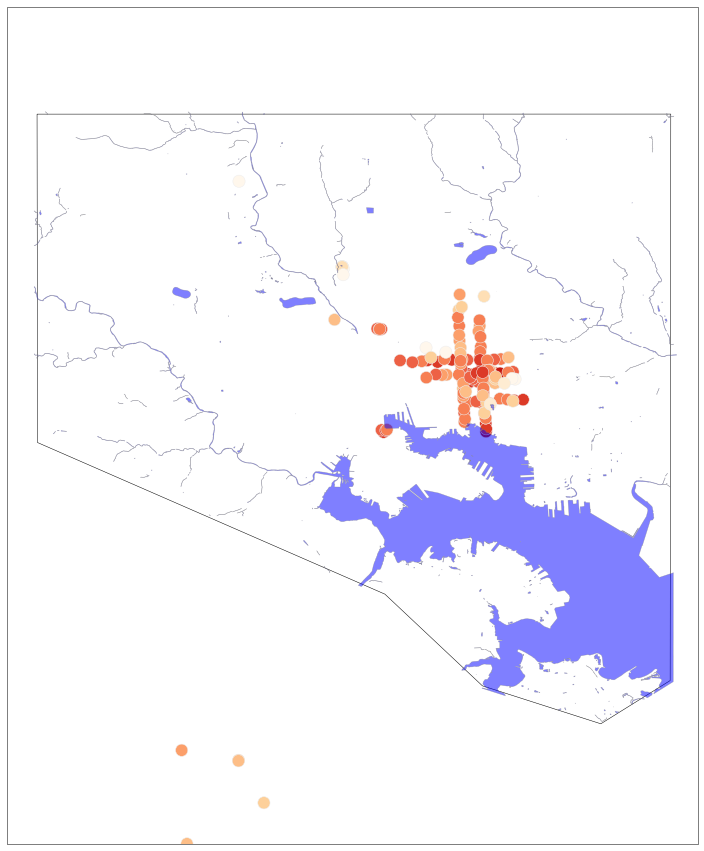

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

#fname = 'data/Baltimore City Line/geo_export_622ca14a-cf38-48b1-b961-89de6f7067b9.shp'
#waterfile = 'data/Water-2/geo_export_a5e512a2-2fa2-47e8-ac32-78f85e798a3c.shp'
#streetfile = 'data/Street Centerlines/geo_export_e4b9d0f9-1780-403e-a2b2-aae2d50f6201.shp'
plt.figure(figsize=[15,15])
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(( meta['location:Longitude'].min()-.05, 
                   meta['location:Longitude'].max()+.05 , 
                   meta['location:Latitude'].min(),
                   meta['location:Latitude'].max()+.05))
# add city boundaries
fname = 'data/Baltimore City Line/geo_export_622ca14a-cf38-48b1-b961-89de6f7067b9.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor='black')
ax.add_feature(shape_feature)

# add streets 
#fname = 'data/Street Centerlines/geo_export_e4b9d0f9-1780-403e-a2b2-aae2d50f6201.shp'
#shape_feature = ShapelyFeature(Reader(fname).geometries(),
#                                ccrs.PlateCarree(), facecolor='none', edgecolor='black')
#ax.add_feature(shape_feature)

# add water
fname = 'data/Water-2/geo_export_a5e512a2-2fa2-47e8-ac32-78f85e798a3c.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='blue', edgecolor='gray', alpha = .5)
ax.add_feature(shape_feature)

x = meta['location:Longitude'].values
y = meta['location:Latitude'].values
c = tempDF[meta.sensornumber].mean()
cmap = matplotlib.cm.OrRd
bounds = np.linspace(round((c.mean()-3)),round((c.mean()+3)),13)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
plotHandle = ax.scatter(x,y,c = c, s = 150, transform=ccrs.Geodetic(), 
                 cmap = cmap,
                 norm = norm)
#plt.show()

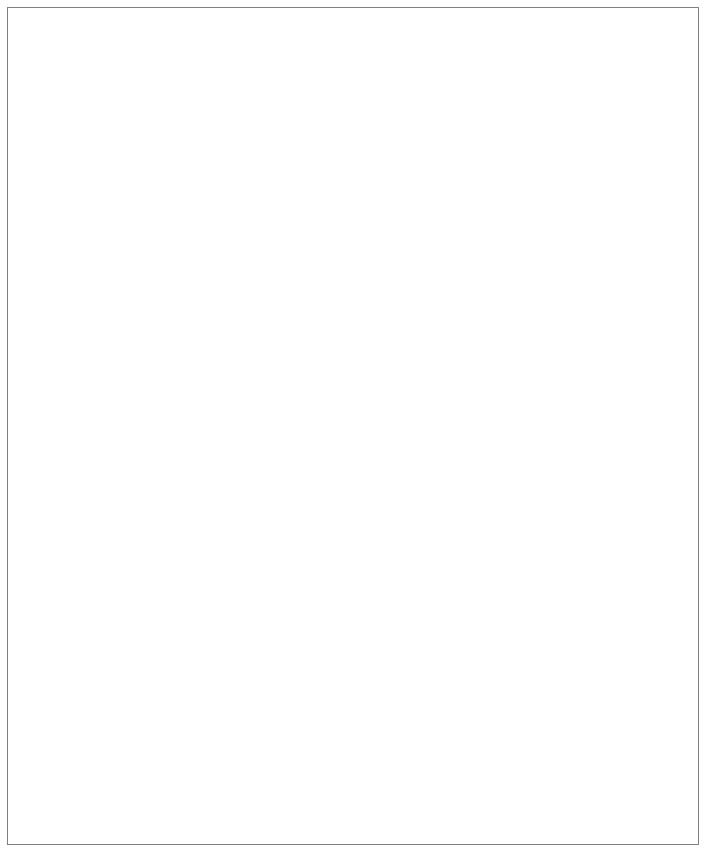

In [3]:
from osgeo import ogr
import shapely.geometry
file1 = 'data/Water-2/geo_export_a5e512a2-2fa2-47e8-ac32-78f85e798a3c.shp'
import shapely.wkt
shapefile = ogr.Open(file1)
layer = shapefile.GetLayer(0)

for i in range(layer.GetFeatureCount()):
    feature = layer.GetFeature(i)
    name = feature.GetField('name')
    #print name
    if name == 'Inner Harbor' : 
        geometry = feature.GetGeometryRef()
        shape = shapely.wkt.loads(geometry.ExportToWkt())

plt.figure(figsize=[15,15])
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(( meta['location:Longitude'].min()-.05, 
                   meta['location:Longitude'].max()+.05 , 
                   meta['location:Latitude'].min(),
                   meta['location:Latitude'].max()+.05))
shape_feature = ShapelyFeature(geometry,
                                ccrs.PlateCarree(), facecolor='blue', edgecolor='gray', alpha = .5)
#ax.add_feature(shape_feature)

In [7]:
# compute distance to the harbor
from shapely.geometry import Point
from osgeo import ogr
import shapely.geometry
file1 = 'data/Water-2/geo_export_a5e512a2-2fa2-47e8-ac32-78f85e798a3c.shp'
import shapely.wkt
shapefile = ogr.Open(file1)
layer = shapefile.GetLayer(0)

for i in range(layer.GetFeatureCount()):
    feature = layer.GetFeature(i)
    name = feature.GetField('name')
    #print name
    if name == 'Inner Harbor' : 
        geometry = feature.GetGeometryRef()
        shape = shapely.wkt.loads(geometry.ExportToWkt())
    
distance_to_water = np.zeros(x.shape[0])
for i in range(0,x.shape[0]) : 
    if ~np.isnan(x[i]) :
        distance_to_water[i] = shape.distance(Point(x[i], y[i]))
    else :
        distance_to_water[i] = 'NaN'
    
print distance_to_water

[ 0.02479029  0.02460469  0.02692243  0.02229623  0.03067742  0.02260059
  0.0221986   0.0237538   0.02204817  0.02590613  0.02409525  0.03073677
  0.02234397  0.02707978  0.02276533  0.0230172   0.02217763  0.04314691
  0.03181393  0.02268264  0.02307637  0.0228795   0.02355648  0.02236176
  0.02060839  0.02931581  0.02366767  0.02259422  0.02251914  0.02274363
  0.04312427  0.02864243  0.03797779  0.02356168  0.01370206  0.04311918
  0.0180855   0.01626245  0.02999711  0.02461148  0.01492872  0.02694357
  0.02822825  0.02144107  0.04311569  0.01374793  0.01762247  0.01426508
  0.01809545  0.01975257  0.02159957  0.01643946  0.03327243  0.01886081
  0.02665193  0.01238359  0.02040411  0.02434781  0.01679097  0.0174569
  0.01885891  0.02361901  0.03478878  0.0198552   0.03188969  0.02237159
  0.01724519  0.03072288  0.02146166  0.01982565  0.04318253  0.01640289
  0.01812081  0.02879842  0.04312086  0.02115596  0.02080709  0.04313296
  0.01680445  0.01314066  0.04247377  0.01289877  0.

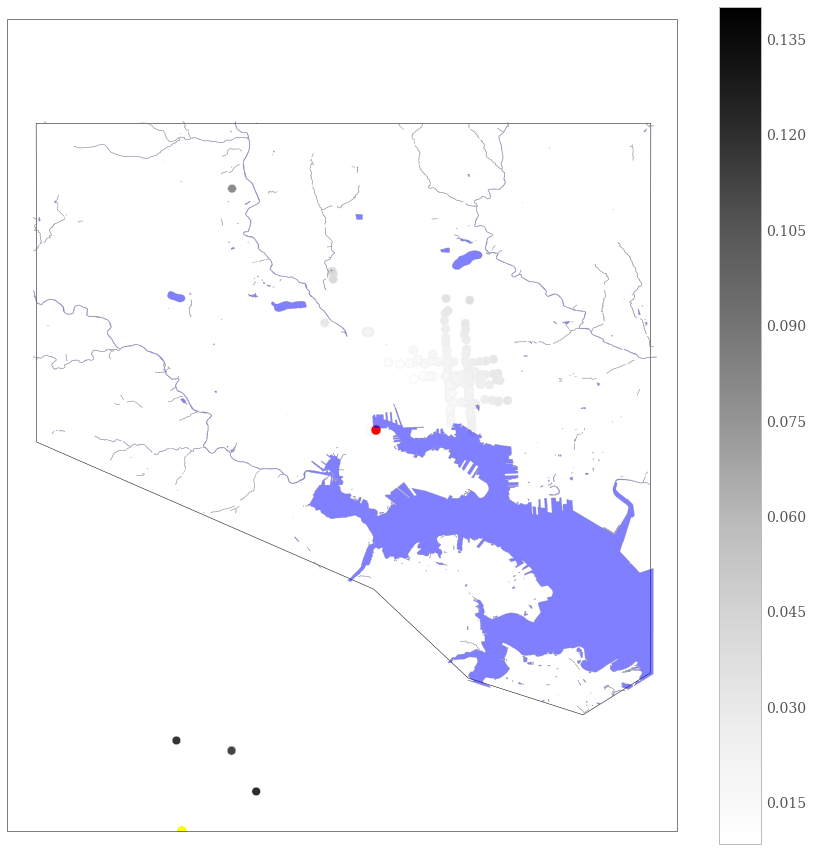

In [19]:
plt.figure(figsize=[15,15])
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(( meta['location:Longitude'].min()-.05, 
                   meta['location:Longitude'].max()+.05 , 
                   meta['location:Latitude'].min(),
                   meta['location:Latitude'].max()+.05))
# add city boundaries
fname = 'data/Baltimore City Line/geo_export_622ca14a-cf38-48b1-b961-89de6f7067b9.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor='black')
ax.add_feature(shape_feature)

# add streets 
#fname = 'data/Street Centerlines/geo_export_e4b9d0f9-1780-403e-a2b2-aae2d50f6201.shp'
#shape_feature = ShapelyFeature(Reader(fname).geometries(),
#                                ccrs.PlateCarree(), facecolor='none', edgecolor='black')
#ax.add_feature(shape_feature)

# add water
fname = 'data/Water-2/geo_export_a5e512a2-2fa2-47e8-ac32-78f85e798a3c.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='blue', edgecolor='gray', alpha = .5)
ax.add_feature(shape_feature)

scatterHandle = ax.scatter(x,y, s = 75, c = distance_to_water, cmap = matplotlib.cm.Greys)
# minimum distance 
a = np.nanargmin(distance_to_water)
ax.scatter(x[a],y[a], s = 100, c = 'red') 
# maximum distance 
b = np.nanargmax(distance_to_water)
ax.scatter(x[b],y[b], s = 100, c = 'yellow')
plt.colorbar(scatterHandle)
#i = 0
#for i in range(0,100): 
#    ax.annotate('%2.2g'%distance_to_water[i], xy = (x[i], y[i]), 
#                xycoords =  ccrs.PlateCarree()._as_mpl_transform(ax))

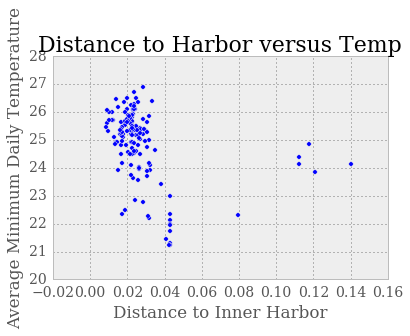

In [13]:
plt.scatter(distance_to_water,c)
plt.xlabel('Distance to Inner Harbor')
plt.ylabel('Average Minimum Daily Temperature')
plt.title('Distance to Harbor versus Temp')